# Plateforme d'Acquisition et de Traitement Automatisé des Textes
### Carnet d'expérimentation
---

## Sujet : Import expériences

---

# Mise en forme données
---

In [1]:
cd ../..

/Volumes/Geek/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns

## GoogleSheet Recueil

In [3]:
import patat.util.gsheet

In [4]:
gs = patat.util.gsheet.GoogleSheet()

In [5]:
sheet_id = '1RFxwIBYqa_eYcx_LZpTdhi47QbLcesz9NByMfGzdJ8s'
range_name = 'articles labellisés'

In [6]:
df_brut = gs.read_df(sheet_id,range_name)

In [7]:
df_brut

,#site,# article,Site,url,Auteur,Date,Titre,justification infox,infox,signé,...,invérifiable,titre décalé,dénigrement,cherry picking,degré infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné),tds
0,1,1,Alnas,https://www.alnas.fr/actualite/communaute/lara...,,31/10/2022,L’Arabie saoudite organise des célébrations d'...,,non,non,...,non,non,non,non,,FB,,,,1
1,1,2,Alnas,https://www.alnas.fr/actualite/en-vrac/quel-ar...,,19/10/2022,« Quel art ! » : un étudiant en droit invente ...,,non,non,...,non,non,non,non,,FB,,,,1
2,1,3,Alnas,https://www.alnas.fr/actualite/politique/laust...,,18/10/2022,L’Australie ne reconnaît plus Jérusalem comme ...,,non,non,...,non,non,non,non,,FB,,,,1
3,1,4,Alnas,https://www.alnas.fr/actualite/communaute/nant...,,17/10/2022,Nantes : une mère musulmane meurt poignardée e...,,non,non,...,non,non,non,non,,FB,,,,1
4,1,5,Alnas,https://www.alnas.fr/actualite/en-vrac/la-fran...,,10/11/2022,La France condamnée pour avoir placé un enfant...,le titre est décalé (donne une impression faus...,non,non,...,non,oui,non,non,,FB,,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,44,621,Wikistrike,https://www.wikistrike.com/2022/10/la-pologne-...,,31/10/2022,La Pologne s’apprête à s’emparer du territoire...,relai de ragots invérifiés,oui,non,...,oui,oui,non,non,2,FB,,,,1
621,44,622,Wikistrike,https://www.wikistrike.com/2022/11/exclusivite...,,19/11/2022,Exclusivité WikiStrike: un physicien en colère...,délire total d'un physicien anonyme (ahurissan...,oui,non,...,non,non,non,non,1,FB,,,,1
622,44,623,Wikistrike,https://www.wikistrike.com/2022/12/zelensky-pa...,,23/12/2023,Zelensky parti demander à papa Biden une aide ...,l'article est vide (même si le titre accuse Ze...,oui,non,...,non,non,non,non,1,FB,,,,1
623,44,624,Wikistrike,https://www.wikistrike.com/2023/01/le-chef-du-...,,03/01/2023,Le chef du renseignement iranien assure que la...,long compte rendu d'un interview du chef du re...,non,non,...,non,non,non,non,,FB,,,,1


In [8]:
import urllib
def get_site(url):
    parse = urllib.parse.urlparse(url)
    if parse:
        return parse.netloc

In [9]:
df_brut['site']=df_brut['url'].apply(get_site)

In [10]:
df_brut.value_counts('site')

site
www.francesoir.fr                    117
www.breizh-info.com                   51
lesmoutonsrebelles.com                44
www.wikistrike.com                    44
lezarceleurs.blogspot.com             36
lesdeqodeurs.fr                       28
lemediaen442.fr                       23
www.profession-gendarme.com           19
www.dreuz.info                        19
fr.sott.net                           18
www.polemia.com                       17
www.mondialisation.ca                 17
www.nouvelordremondial.cc             14
reseauinternational.net               14
www.lelibrepenseur.org                14
www.voltairenet.org                   13
www.lesalonbeige.fr                   10
www.anguillesousroche.com             10
lecourrier-du-soir.com                 9
www.preuvesduparanormal.fr             8
www.les-crises.fr                      8
lesobservateurs.ch                     8
lesakerfrancophone.fr                  7
www.medias-presse.info                 7
www.alnas.f

## Création recueil

## Normalisation labels

In [11]:
from patat.imp.labels import label_translator
from patat.imp.labels import short_label_names

In [12]:
df_recueil = df_brut.rename(columns=label_translator)
df_label = df_recueil[['url'] + short_label_names].copy()

In [13]:
import numpy as np
def normalize_label(value):
    if type(value) != str:
        return np.NaN
    elif value == 'oui':
        return 1.0
    elif value =='non' :
        return 0.0
    else:
        return np.NaN

In [14]:
for label in short_label_names:
    df_label[label]=df_label[label].apply(normalize_label)

In [15]:
df_label

,url,infox,signe,entites_nommees,entites_coherentes,ouverture_esprit,qualite_ecriture,faits,opinions,fausse_nouvelle,...,trop_mots,trop_chiffres,sophisme,inversion_preuve,inverifiable,propos_raportes,sources_citees,titre_decale,denigrement,cherry_picking
0,https://www.alnas.fr/actualite/communaute/lara...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://www.alnas.fr/actualite/en-vrac/quel-ar...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://www.alnas.fr/actualite/politique/laust...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://www.alnas.fr/actualite/communaute/nant...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://www.alnas.fr/actualite/en-vrac/la-fran...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,https://www.wikistrike.com/2022/10/la-pologne-...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
621,https://www.wikistrike.com/2022/11/exclusivite...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
622,https://www.wikistrike.com/2022/12/zelensky-pa...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
623,https://www.wikistrike.com/2023/01/le-chef-du-...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Importation et parsing articles

In [16]:
from patat.imp.importer import Importer
from patat.imp.parser import Parser

In [17]:
imp = Importer()
parser = Parser()

In [18]:
htmls = []
for url in df_brut['url']:
    print(url)
    try:
        htmls.append(imp.get_webpage(url))
    except:
        print('Error !')

https://www.alnas.fr/actualite/communaute/larabie-saoudite-organise-des-celebrations-dhalloween-autrefois-interdites/
https://www.alnas.fr/actualite/en-vrac/quel-art-un-etudiant-en-droit-invente-un-systeme-ingenieux-pour-tricher-pendant-ses-examens/
https://www.alnas.fr/actualite/politique/laustralie-ne-reconnait-plus-jerusalem-comme-capitale-disrael/
https://www.alnas.fr/actualite/communaute/nantes-une-mere-musulmane-meurt-poignardee-en-pleine-rue-le-suspect-en-fuite/
https://www.alnas.fr/actualite/en-vrac/la-france-condamnee-pour-avoir-place-un-enfant-musulman-dans-une-famille-chretienne/
https://www.alnas.fr/actualite/communaute/hassan-iquioussen-la-justice-belge-refuse-de-remettre-limam-a-la-france/
https://www.alnas.fr/actualite/en-vrac/les-emirats-arabes-unis-et-larabie-saoudite-fournissent-764-des-besoins-du-japon-en-petrole/
https://www.anguillesousroche.com/actualite/ouverture-du-gazoduc-baltic-pipe-qui-relie-la-norvege-et-la-pologne/
https://www.anguillesousroche.com/technolo

ERROR:root:Importer.get_webpage:https://planetes360.fr/urgent-votre-argent-les-interesse-un-reset-qui-pourrait-bien-ruiner-des-millions-de-francais/


https://planetes360.fr/sarah-ransome-victime-depstein-affirme-posseder-une-video-identifiant-des-elites-pedocriminelles/
https://planetes360.fr/la-france-vit-tous-les-symptomes-dun-effondrement-depuis-plusieurs-annees-maintenant-et-malheureusement-cela-risque-de-sempirer-et-la-chute-risque-de-saccelerer/


ERROR:root:Importer.get_webpage:https://planetes360.fr/la-france-vit-tous-les-symptomes-dun-effondrement-depuis-plusieurs-annees-maintenant-et-malheureusement-cela-risque-de-sempirer-et-la-chute-risque-de-saccelerer/


https://www.polemia.com/la-droite-face-a-limperatif-culturel/
https://www.polemia.com/elisabeth-borne-et-lecole-cynisme-et-deconstruction/
https://www.polemia.com/jean-francois-carenco-a-loutre-mer-mensonge-et-repression-au-programme/
https://www.polemia.com/le-defile-du-14-juillet-une-histoire-du-lien-national/
https://www.polemia.com/une-guerre-civile-menee-contre-les-peuples-indigenes-deurope/
https://www.polemia.com/les-j-o-2024-en-seine-saint-denis-une-folie-criminelle/
https://www.polemia.com/pouvoir-dachat-la-grande-arnaque-par-jean-yves-le-gallou/
https://www.polemia.com/pap-ndiaye-a-leducation-nationale-deconstruction-et-hypocrisie/
https://www.polemia.com/italie-vers-un-prochain-blocus-a-limmigration-clandestine/
https://www.polemia.com/disparition-de-francois-bernard-huyghe-un-phare-en-pleine-tempete/
https://www.polemia.com/callac-laboratoire-du-peuplement-de-la-france-profonde-par-limmigration/
https://www.polemia.com/derriere-papy-biden-letat-profond-americain-a-la-manoeu

ERROR:root:Importer.get_webpage:https://www.wikistrike.com/2023/01/guerre-en-ukraine-la-russie-envoie-de-nouvelles-troupes-en-bielorussie-alors-que-les-craintes-d-une-nouvelle-attaque-grandissent.html


In [19]:
len(htmls)

625

In [20]:
 df_new_url = df_recueil[df_recueil['url'].apply(parser.is_known_site)]

In [21]:
n=1
pages = {}
parsed_articles = []
for url in df_new_url['url']:
    print(n,url)
    pages[url] = imp.get_webpage(url)
    if pages[url]:
        parsed_articles.append(parser.parse_article_selector(url,pages[url],imp.get_site(url)))
    n+=1


1 https://www.alnas.fr/actualite/communaute/larabie-saoudite-organise-des-celebrations-dhalloween-autrefois-interdites/
2 https://www.alnas.fr/actualite/en-vrac/quel-art-un-etudiant-en-droit-invente-un-systeme-ingenieux-pour-tricher-pendant-ses-examens/
3 https://www.alnas.fr/actualite/politique/laustralie-ne-reconnait-plus-jerusalem-comme-capitale-disrael/
4 https://www.alnas.fr/actualite/communaute/nantes-une-mere-musulmane-meurt-poignardee-en-pleine-rue-le-suspect-en-fuite/
5 https://www.alnas.fr/actualite/en-vrac/la-france-condamnee-pour-avoir-place-un-enfant-musulman-dans-une-famille-chretienne/
6 https://www.alnas.fr/actualite/communaute/hassan-iquioussen-la-justice-belge-refuse-de-remettre-limam-a-la-france/
7 https://www.alnas.fr/actualite/en-vrac/les-emirats-arabes-unis-et-larabie-saoudite-fournissent-764-des-besoins-du-japon-en-petrole/
8 https://www.anguillesousroche.com/actualite/ouverture-du-gazoduc-baltic-pipe-qui-relie-la-norvege-et-la-pologne/
9 https://www.anguillesous

73 https://www.breizh-info.com/2022/10/02/208574/stonehenge-patrimoine-africain-ben-voyons/
74 https://www.breizh-info.com/2022/11/08/210352/la-reconquete-se-fera-par-la-secession-retour-sur-le-colloque-academia-christiana-du-5-novembre-a-paris/
75 https://www.breizh-info.com/2022/11/19/210855/e-darles-et-v-pavan-sur-les-effets-indesirables-il-manque-6000-deces-dans-les-bases-de-donnees/
76 https://www.breizh-info.com/2023/04/06/218201/covid-19-quels-sont-jusqua-present-les-resultats-planetaires-de-lexperimentation-vaccinale-de-masse-le-point-de-situation-a-avril-2023/
77 https://www.cnews.fr/faits-divers/2022-08-23/saone-et-loire-un-forcene-retranche-dans-un-hotel-de-montceau-les-mines
78 https://www.cnews.fr/france/2022-08-23/mayotte-des-centres-de-redressement-pour-les-mineurs-delinquants-1256876
79 https://www.cnews.fr/france/2022-08-23/kohlantess-responsabilite-selection-des-participants-que-contient-le-rapport-du
80 https://www.cnews.fr/france/2022-08-23/kohlantess-un-participant

151 https://www.francesoir.fr/politique-monde/vatican-nft-metaverse-realite-virtuelle
152 https://www.francesoir.fr/societe-faits-divers/capes-de-moins-en-moins-de-candidats
153 https://www.francesoir.fr/culture-celebrites/cannes-2022-fin-dun-festival-politise-ruben-ostlund-rafle-la-palme-dor
154 https://www.francesoir.fr/societe-sante/variole-du-singe-les-premiers-cas-contacts-ont-ete-vaccines-en-france-vendredi
155 https://www.francesoir.fr/politique-monde/oms-variole-du-singe-ne-pas-sinquieter
156 https://www.francesoir.fr/societe-sante/le-maire-de-cholet-demissionne-du-conseil-de-surveillance-de-l-hopital-public
157 https://www.francesoir.fr/vie-quotidienne/japon-cafe-teletravail-deadline
158 https://www.francesoir.fr/opinions-editos/de-limportance-de-langle
159 https://www.francesoir.fr/opinions-editos/cest-celui-qui-dit-qui-l-est
160 https://www.francesoir.fr/politique-monde/le-declin-demographique-de-la-chine
161 https://www.francesoir.fr/politique-france/manifestation-hopital-m

238 https://www.lelibrepenseur.org/demonstration-factuelle-que-les-injections-darn-messager-sont-une-arnaque-qui-na-rien-de-scientifique/
239 https://lecourrier-du-soir.com/coup-de-tonnerre-en-espagne-le-gouvernement-des-baleares-avoue-que-16-personnes-ont-ete-tuees-par-le-vaccin/
240 https://lecourrier-du-soir.com/coup-de-theatre-une-revue-scientifique-mondiale-confirme-que-le-vaccin-provoque-des-troubles-menstruels/
241 https://lecourrier-du-soir.com/gros-scandale-en-france-en-pleine-crise-financiere-letat-va-emprunter-270-milliards-deuros-en-2023-du-jamais-vu/
242 https://lecourrier-du-soir.com/france-la-plainte-contre-le-professeur-perronne-rejetee-en-colere-lordre-des-medecins-menace-de-faire-appel/
243 https://lecourrier-du-soir.com/la-russie-crache-le-morceau-le-but-des-etats-unis-est-daffaiblir-leurope-militairement-et-de-la-desindustrialiser/
244 https://lecourrier-du-soir.com/gros-scandale-aux-usa-en-seulement-9-mois-de-guerre-les-etats-unis-ont-deja-verse-19-milliards-a-lukr

309 https://lesdeqodeurs.fr/ces-personnes-meritent-le-blame-pour-la-mort-de-pres-dun-million-damericains/
310 https://lesdeqodeurs.fr/le-prince-charles-a-t-il-ignore-les-signaux-dalarme-indiquant-que-son-ami-jimmy-savile-etait-un-agresseur-ou-ses-assistants-ne-lui-ont-ils-jamais-dit/
311 https://lesdeqodeurs.fr/le-procureur-nomme-par-trump-david-weiss-envisage-dinculper-hunter-biden/
312 https://lesdeqodeurs.fr/les-marxistes-cherchent-a-destabiliser-la-societe-americaine-par-la-sexualisation-des-jeunes/
313 https://lesdeqodeurs.fr/le-president-trump-dece-la-corruption-de-la-machine-obama/
314 https://lesdeqodeurs.fr/voici-tout-ce-que-les-medias-ne-vous-diront-pas-sur-nina-jankowicz-la-nouvelle-ministre-de-la-verite-de-biden/
315 https://lesdeqodeurs.fr/a-propos-de-ces-comptes-bot-twitter/
316 https://lesdeqodeurs.fr/fusillade-de-buffalo-ces-drapeaux-ne-se-falsifient-pas-tout-seuls/
317 https://lesdeqodeurs.fr/fact-checker-les-fact-checkers/
318 https://lesdeqodeurs.fr/des-preuves-de-pa

388 https://www.medias-presse.info/natalia-vovk-suspecte-de-lattentat-meurtrier-contre-daria-douguine/161836/
389 https://www.medias-presse.info/contrat-secret-entre-pfizer-et-von-der-leyen-bourla-pdg-de-pfizer-refuse-de-comparaitre-devant-la-commission-parlementaire-de-lue/163672/
390 https://www.medias-presse.info/pelerinage-de-la-fsspx-a-lourdes-certains-grincheux-sinterrogent-sur-la-presence-des-traditionalistes-dans-le-sanctuaire/164929/
391 https://www.medias-presse.info/genderofolie-une-adolescente-ex-trans-poursuit-les-medecins-qui-ont-conduit-a-sa-mutilation/165924/
392 https://www.medias-presse.info/nouveau-scandale-aux-etats-unis-un-livre-sur-la-transition-de-genre-pour-les-enfants-de-3-ans/167546/
393 https://www.medias-presse.info/joe-allen-nos-elites-veulent-vivre-eternellement-les-milliardaires-craignent-la-mort-comme-si-lenfer-les-attendait/168152/
394 https://www.mondialisation.ca/les-destins-tragiques-de-stars-mondiales-comme-celine-dion-et-justin-bieber-vont-ils-ouvr

456 https://www.nouvelordremondial.cc/2022/07/12/et-maintenant-une-epidemie-du-virus-de-marburg-a-commence/
457 https://www.nouvelordremondial.cc/2022/07/12/une-entree-sombre-de-70-metres-decouverte-dans-un-cratere-lunaire-sur-google-moon-29-juin-2022/
458 https://www.nouvelordremondial.cc/2022/07/12/apres-le-crash-de-lovni-a-roswell-en-1947-les-militaires-ont-cherche-des-cercueils-de-la-taille-dun-enfant/
459 https://www.nouvelordremondial.cc/2022/08/24/les-employes-dapple-forment-une-resistance-contre-les-plans-de-retour-au-bureau-de-la-societe/
460 https://www.nouvelordremondial.cc/2022/08/24/cnn-est-en-train-de-se-faire-eventrer-parce-que-les-medias-gauchistes-ne-sont-pas-aussi-attrayants-quils-le-pensent/
461 https://www.nouvelordremondial.cc/2022/08/24/alors-que-singapour-autorise-les-relations-homosexuelles-voici-le-statut-juridique-de-lhomosexualite-dans-le-monde/
462 https://www.nouvelordremondial.cc/2022/09/01/la-theorie-de-la-fuite-en-laboratoire-et-ce-que-nous-savons-de-la-

ERROR:root:Importer.get_webpage:https://planetes360.fr/urgent-votre-argent-les-interesse-un-reset-qui-pourrait-bien-ruiner-des-millions-de-francais/


478 https://planetes360.fr/sarah-ransome-victime-depstein-affirme-posseder-une-video-identifiant-des-elites-pedocriminelles/
479 https://planetes360.fr/la-france-vit-tous-les-symptomes-dun-effondrement-depuis-plusieurs-annees-maintenant-et-malheureusement-cela-risque-de-sempirer-et-la-chute-risque-de-saccelerer/


ERROR:root:Importer.get_webpage:https://planetes360.fr/la-france-vit-tous-les-symptomes-dun-effondrement-depuis-plusieurs-annees-maintenant-et-malheureusement-cela-risque-de-sempirer-et-la-chute-risque-de-saccelerer/


480 https://www.polemia.com/la-droite-face-a-limperatif-culturel/
481 https://www.polemia.com/elisabeth-borne-et-lecole-cynisme-et-deconstruction/
482 https://www.polemia.com/jean-francois-carenco-a-loutre-mer-mensonge-et-repression-au-programme/
483 https://www.polemia.com/le-defile-du-14-juillet-une-histoire-du-lien-national/
484 https://www.polemia.com/une-guerre-civile-menee-contre-les-peuples-indigenes-deurope/
485 https://www.polemia.com/les-j-o-2024-en-seine-saint-denis-une-folie-criminelle/
486 https://www.polemia.com/pouvoir-dachat-la-grande-arnaque-par-jean-yves-le-gallou/
487 https://www.polemia.com/pap-ndiaye-a-leducation-nationale-deconstruction-et-hypocrisie/
488 https://www.polemia.com/italie-vers-un-prochain-blocus-a-limmigration-clandestine/
489 https://www.polemia.com/disparition-de-francois-bernard-huyghe-un-phare-en-pleine-tempete/
490 https://www.polemia.com/callac-laboratoire-du-peuplement-de-la-france-profonde-par-limmigration/
491 https://www.polemia.com/derrier

559 https://fr.sott.net/article/40371-L-OMS-recommande-un-nouveau-vaccin-contre-la-polio-finance-par-Gates-pour-faire-face-a-l-epidemie-de-polio-derivee-du-vaccin-au-Royaume-Uni
560 https://fr.sott.net/article/40404-Propagande-operations-psychologiques-et-guerre-cognitive-Les-actions-de-l-OTAN-pour-le-controle-de-l-opinion-publique
561 https://fr.sott.net/article/40423-Toutes-les-decisions-de-la-politique-sanitaire-d-Emmanuel-Macron-ont-coute-plus-de-600-milliards-pour-quel-resultat
562 https://fr.sott.net/article/40491-Chaos-factuel-a-l-OMS-Dr-Tedros-L-epidemie-de-variole-du-singe-se-concentre-parmi-les-hommes-qui-ont-des-rapports-sexuels-avec-des-hommes-L-estimation-douteuse-de-99
563 https://fr.sott.net/article/40793-Ecolo-nazisme-et-mise-en-place-du-plan-Morgenthau-en-Allemagne
564 https://fr.sott.net/article/40820-Leur-propagande-vient-de-loin-et-nous-le-savons
565 https://fr.sott.net/article/40917-Les-Etats-Unis-declarent-la-guerre-a-la-Russie-l-Allemagne-les-Pays-Bas-et-la-Franc

ERROR:root:Importer.get_webpage:https://www.wikistrike.com/2023/01/guerre-en-ukraine-la-russie-envoie-de-nouvelles-troupes-en-bielorussie-alors-que-les-craintes-d-une-nouvelle-attaque-grandissent.html


623 https://www.wikistrike.com/2022/12/zelensky-parti-demander-a-papa-biden-une-aide-pour-son-pays-et-son-compte-en-banque.html
624 https://www.wikistrike.com/2023/01/le-chef-du-renseignement-iranien-assure-que-la-cia-dicte-son-carnet-de-route-a-emmanuel-macron.html
625 https://www.wikistrike.com/2023/01/guerre-en-ukraine-la-russie-envoie-de-nouvelles-troupes-en-bielorussie-alors-que-les-craintes-d-une-nouvelle-attaque-grandissent.html


In [22]:
df_articles = pd.DataFrame(parsed_articles)

In [23]:
df_articles

,url,site,title,article,author,date,tags,paragraphs,date_iso,abstract
0,https://www.alnas.fr/actualite/communaute/lara...,www.alnas.fr,L’Arabie saoudite organise des célébrations d'...,L’Arabie saoudite a organisé un événement pour...,Par Youcef -,31/10/2022,"[Accueil, Actualités, Communauté]",[L’Arabie saoudite a organisé un événement pou...,2022-10-31T00:00:00,
1,https://www.alnas.fr/actualite/en-vrac/quel-ar...,www.alnas.fr,« Quel art ! » : un étudiant en droit invente ...,Une professeure de droit a partagé sur Twitter...,Par Oussama -,19/10/2022,"[Accueil, Actualités, En vrac]",[Une professeure de droit a partagé sur Twitte...,2022-10-19T00:00:00,
2,https://www.alnas.fr/actualite/politique/laust...,www.alnas.fr,L’Australie ne reconnaît plus Jérusalem comme ...,Le gouvernement israélien a qualifié la positi...,Par Oussama -,18/10/2022,"[Accueil, Actualités, Politique]",[Le gouvernement israélien a qualifié la posit...,2022-10-18T00:00:00,
3,https://www.alnas.fr/actualite/communaute/nant...,www.alnas.fr,Nantes : une mère musulmane meurt poignardée e...,NANTES – Une enquête pour « homicide volontair...,Par Sarah -,17/10/2022,"[Accueil, Actualités, Communauté]",[NANTES – Une enquête pour « homicide volontai...,2022-10-17T00:00:00,
4,https://www.alnas.fr/actualite/en-vrac/la-fran...,www.alnas.fr,La France condamnée pour avoir placé un enfant...,La Cour européenne des droits de l’Homme (CEDH...,Par Sarah -,10/11/2022,"[Accueil, Actualités, En vrac]",[La Cour européenne des droits de l’Homme (CED...,2022-11-10T00:00:00,
...,...,...,...,...,...,...,...,...,...,...
617,https://www.wikistrike.com/2022/10/selon-un-an...,www.wikistrike.com,"Selon un ancien conseiller du Pentagone, les É...","Selon un ancien conseiller du Pentagone, les c...",,Publié par wikistrike.com\n ...,"[#Economie, #Politique internationale]","[Selon un ancien conseiller du Pentagone, les ...",2022-10-04T00:00:00,
618,https://www.wikistrike.com/2022/10/la-pologne-...,www.wikistrike.com,La Pologne s’apprête à s’emparer du territoire...,La Pologne se prépare à s’emparer du territoir...,,Publié par wikistrike.com\n ...,[#Politique internationale],[La Pologne se prépare à s’emparer du territoi...,2022-10-31T00:00:00,
619,https://www.wikistrike.com/2022/11/exclusivite...,www.wikistrike.com,Exclusivité WikiStrike: un physicien en colère...,"Crise énergétique battant son plein, WikiStri...",,Publié par wikistrike.com\n ...,"[#Ecologie - conso - biodiversité - énergie, #...","[Crise énergétique battant son plein, WikiStr...",2022-11-19T00:00:00,
620,https://www.wikistrike.com/2022/12/zelensky-pa...,www.wikistrike.com,Zelensky parti demander à papa Biden une aide ...,"Alors que des milliers d’Ukrainiens meurent, Z...",,Publié par wikistrike.com\n ...,[#Politique internationale],"[Alors que des milliers d’Ukrainiens meurent, ...",2022-12-23T00:00:00,


In [24]:
df_recueil_export = pd.merge(df_articles,df_label, on='url')

In [25]:
df_recueil_export['p_count']=df_recueil_export['paragraphs'].apply(len)

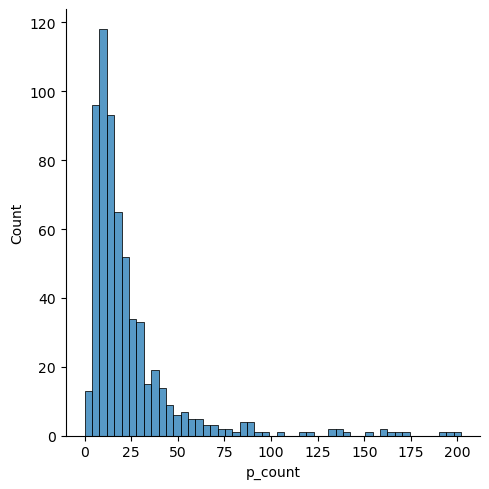

In [26]:
sns.displot(df_recueil_export,x='p_count')

# Mesure et observation des résultats
---

# Sauvegarde des résultats
---

In [27]:
filename = 'data/demo/230426-OIDS-Recueil.csv'

In [28]:
df_recueil_export.to_csv(filename)

# Conclusions
---

- Ajout Recueil
- Ajour Labelizer

# Bricolages
---